In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset

import pandas
import matplotlib.pyplot as plt

In [ ]:
class MnistDataset(Dataset):

    def __init__(self):
        self.data_df = pandas.read_csv("./mnist_train.csv", header=None)

    def __len__(self):
        return len(self.data_df)
    
    def __getitem__(self, index):
        label = self.data_df.iloc[index,0]
        target = torch.zeros((10))
        target[label] = 1.0

        image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values) / 255.0

        return label, image_values, target
    
    def plot_image(self, index):

        img = self.data_df.iloc[index,1:].values.reshape(28,28)
        plt.title("label = " + str(self.data_df.iloc[index,0]))
        plt.imshow(img, interpolation="none", cmap="Blues")
        pass

    pass

In [2]:
import helpers
mnist_dataset = helpers.MnistDataset()

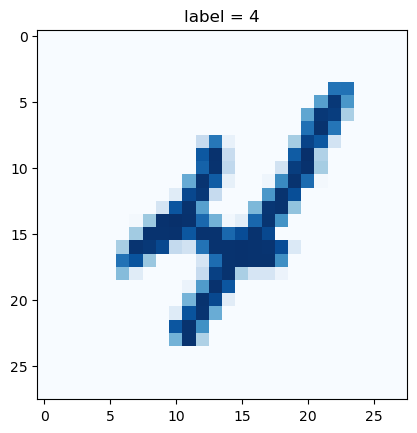

In [3]:
mnist_dataset.plot_image(9)

In [ ]:
mnist_dataset[100]

In [4]:
class Classifier(nn.Module):

    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(784, 200),
            nn.Sigmoid(),
            nn.Linear(200, 10),
            nn.Sigmoid()
        )

        self.loss_function = nn.MSELoss()

        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        self.counter = 0
        self.progress = []

        pass

    def forward(self, inputs):
        return self.model(inputs)
    
    def train(self, inputs, targets):
        outputs = self.forward(inputs)
        loss = self.loss_function(outputs, targets)

        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 100000 == 0):
            print("counter = ", self.counter)
            pass

        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass

    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=["loss"])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker=".", grid=True, yticks=(0, 0.25, 0.5))
        pass

    pass

In [ ]:
%%time

classifier = Classifier()
epochs = 4

for i in range(epochs):
    print("training epoch", i+1, "of", epochs)
    for label, image_data_tensor, target_tensor in mnist_dataset:
        classifier.train(image_data_tensor, target_tensor)
        pass
    pass

In [ ]:
classifier.plot_progress()

In [ ]:
record = 19
mnist_dataset.plot_image(record)

In [ ]:
image_data = mnist_dataset[record][1]
output = classifier.forward(image_data)
pandas.DataFrame(output.detach().numpy()).plot(kind="bar", legend=False, ylim=(0.1))

In [ ]:
score = 0
items = 0

for label, image_data_tensor, target_tensor in mnist_dataset:
    answer = classifier.forward(image_data_tensor).detach().numpy()
    if (answer.argmax() == label):
        score += 1
        pass
    items += 1
    pass

print(score, items, score/items)